# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sun Mar  8 12:17:35 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


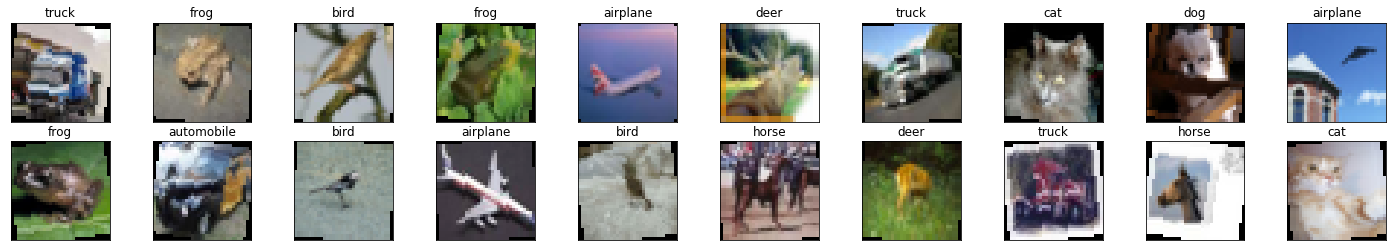

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
                                        verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.1405707597732544 Batch_id=390 Accuracy=51.44: 100%|██████████| 391/391 [01:25<00:00,  4.56it/s]



Test set: Average loss: 0.0103, Accuracy: 5488/10000 (54.88%)

Validation accuracy increased (0.000000 --> 54.880000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=0.7482826113700867 Batch_id=390 Accuracy=70.17: 100%|██████████| 391/391 [01:41<00:00,  3.85it/s]



Test set: Average loss: 0.0077, Accuracy: 6551/10000 (65.51%)

Validation accuracy increased (54.880000 --> 65.510000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.5474807024002075 Batch_id=390 Accuracy=76.94: 100%|██████████| 391/391 [01:39<00:00,  3.93it/s] 



Test set: Average loss: 0.0069, Accuracy: 7098/10000 (70.98%)

Validation accuracy increased (65.510000 --> 70.980000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.5264634490013123 Batch_id=390 Accuracy=80.83: 100%|██████████| 391/391 [01:36<00:00,  4.05it/s] 



Test set: Average loss: 0.0055, Accuracy: 7667/10000 (76.67%)

Validation accuracy increased (70.980000 --> 76.670000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=0.4130825996398926 Batch_id=390 Accuracy=83.34: 100%|██████████| 391/391 [01:34<00:00,  4.14it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7596/10000 (75.96%)

Learning rate = 0.01  for epoch:  6
EPOCH: 6


Loss=0.46375417709350586 Batch_id=390 Accuracy=85.21: 100%|██████████| 391/391 [01:37<00:00,  4.02it/s]



Test set: Average loss: 0.0051, Accuracy: 7842/10000 (78.42%)

Validation accuracy increased (76.670000 --> 78.420000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


Loss=0.4821203351020813 Batch_id=390 Accuracy=86.97: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s] 



Test set: Average loss: 0.0048, Accuracy: 8002/10000 (80.02%)

Validation accuracy increased (78.420000 --> 80.020000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


Loss=0.42630642652511597 Batch_id=390 Accuracy=88.34: 100%|██████████| 391/391 [01:35<00:00,  4.11it/s]



Test set: Average loss: 0.0045, Accuracy: 8140/10000 (81.40%)

Validation accuracy increased (80.020000 --> 81.400000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


Loss=0.23251290619373322 Batch_id=390 Accuracy=89.64: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]



Test set: Average loss: 0.0044, Accuracy: 8210/10000 (82.10%)

Validation accuracy increased (81.400000 --> 82.100000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  10
EPOCH: 10


Loss=0.2557090222835541 Batch_id=390 Accuracy=90.72: 100%|██████████| 391/391 [01:36<00:00,  4.05it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8120/10000 (81.20%)

Learning rate = 0.01  for epoch:  11
EPOCH: 11


Loss=0.3057708144187927 Batch_id=390 Accuracy=91.50: 100%|██████████| 391/391 [01:39<00:00,  3.95it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8137/10000 (81.37%)

Epoch    11: reducing learning rate of group 0 to 1.0000e-03.
Learning rate = 0.001  for epoch:  12
EPOCH: 12


Loss=0.08717487752437592 Batch_id=390 Accuracy=95.07: 100%|██████████| 391/391 [01:43<00:00,  3.76it/s] 



Test set: Average loss: 0.0035, Accuracy: 8597/10000 (85.97%)

Validation accuracy increased (82.100000 --> 85.970000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  13
EPOCH: 13


Loss=0.11710424721240997 Batch_id=390 Accuracy=96.00: 100%|██████████| 391/391 [01:43<00:00,  3.78it/s] 



Test set: Average loss: 0.0034, Accuracy: 8675/10000 (86.75%)

Validation accuracy increased (85.970000 --> 86.750000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  14
EPOCH: 14


Loss=0.17925402522087097 Batch_id=390 Accuracy=96.40: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8668/10000 (86.68%)

Learning rate = 0.001  for epoch:  15
EPOCH: 15


Loss=0.06974922865629196 Batch_id=390 Accuracy=96.85: 100%|██████████| 391/391 [01:42<00:00,  3.82it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8666/10000 (86.66%)

Epoch    15: reducing learning rate of group 0 to 1.0000e-04.
Learning rate = 0.0001  for epoch:  16
EPOCH: 16


Loss=0.084285207092762 Batch_id=390 Accuracy=97.23: 100%|██████████| 391/391 [01:42<00:00,  3.83it/s]   



Test set: Average loss: 0.0034, Accuracy: 8684/10000 (86.84%)

Validation accuracy increased (86.750000 --> 86.840000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.0001  for epoch:  17
EPOCH: 17


Loss=0.09292329102754593 Batch_id=390 Accuracy=97.26: 100%|██████████| 391/391 [01:40<00:00,  3.87it/s] 



Test set: Average loss: 0.0034, Accuracy: 8687/10000 (86.87%)

Validation accuracy increased (86.840000 --> 86.870000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.0001  for epoch:  18
EPOCH: 18


Loss=0.13671369850635529 Batch_id=390 Accuracy=97.35: 100%|██████████| 391/391 [01:38<00:00,  3.96it/s] 



Test set: Average loss: 0.0035, Accuracy: 8700/10000 (87.00%)

Validation accuracy increased (86.870000 --> 87.000000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.0001  for epoch:  19
EPOCH: 19


Loss=0.09552735835313797 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [01:39<00:00,  3.92it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8678/10000 (86.78%)

Epoch    19: reducing learning rate of group 0 to 1.0000e-05.
Learning rate = 1e-05  for epoch:  20
EPOCH: 20


Loss=0.1493523269891739 Batch_id=390 Accuracy=97.44: 100%|██████████| 391/391 [01:41<00:00,  3.86it/s]  



Test set: Average loss: 0.0034, Accuracy: 8713/10000 (87.13%)

Validation accuracy increased (87.000000 --> 87.130000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1e-05  for epoch:  21
EPOCH: 21


Loss=0.0328296534717083 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8702/10000 (87.02%)

Learning rate = 1e-05  for epoch:  22
EPOCH: 22


Loss=0.0932411327958107 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [01:47<00:00,  3.63it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8682/10000 (86.82%)

Epoch    22: reducing learning rate of group 0 to 1.0000e-06.
Learning rate = 1.0000000000000002e-06  for epoch:  23
EPOCH: 23


Loss=0.07188662886619568 Batch_id=390 Accuracy=97.48: 100%|██████████| 391/391 [01:48<00:00,  3.61it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8690/10000 (86.90%)

Learning rate = 1.0000000000000002e-06  for epoch:  24
EPOCH: 24


Loss=0.14457423985004425 Batch_id=390 Accuracy=97.58: 100%|██████████| 391/391 [01:42<00:00,  3.82it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8684/10000 (86.84%)

Learning rate = 1.0000000000000002e-06  for epoch:  25
EPOCH: 25


Loss=0.1143217459321022 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [01:42<00:00,  3.80it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8681/10000 (86.81%)

Epoch    25: reducing learning rate of group 0 to 1.0000e-07.
Learning rate = 1.0000000000000002e-07  for epoch:  26
EPOCH: 26


Loss=0.1061292514204979 Batch_id=390 Accuracy=97.36: 100%|██████████| 391/391 [01:43<00:00,  3.79it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8712/10000 (87.12%)

Learning rate = 1.0000000000000002e-07  for epoch:  27
EPOCH: 27


Loss=0.14999614655971527 Batch_id=390 Accuracy=97.38: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8684/10000 (86.84%)

Learning rate = 1.0000000000000002e-07  for epoch:  28
EPOCH: 28


Loss=0.09318877756595612 Batch_id=390 Accuracy=97.38: 100%|██████████| 391/391 [01:45<00:00,  3.69it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8690/10000 (86.90%)

Epoch    28: reducing learning rate of group 0 to 1.0000e-08.
Learning rate = 1.0000000000000004e-08  for epoch:  29
EPOCH: 29


Loss=0.06662921607494354 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [01:45<00:00,  3.71it/s] 



Test set: Average loss: 0.0034, Accuracy: 8713/10000 (87.13%)

Validation accuracy increased (87.130000 --> 87.130000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000004e-08  for epoch:  30
EPOCH: 30


Loss=0.10224554687738419 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [01:42<00:00,  3.81it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8703/10000 (87.03%)

Learning rate = 1.0000000000000004e-08  for epoch:  31
EPOCH: 31


Loss=0.18009227514266968 Batch_id=390 Accuracy=97.51: 100%|██████████| 391/391 [01:43<00:00,  3.77it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8698/10000 (86.98%)

Learning rate = 1.0000000000000004e-08  for epoch:  32
EPOCH: 32


Loss=0.0665225237607956 Batch_id=390 Accuracy=97.51: 100%|██████████| 391/391 [01:39<00:00,  3.92it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8695/10000 (86.95%)

Learning rate = 1.0000000000000004e-08  for epoch:  33
EPOCH: 33


Loss=0.054341137409210205 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [01:38<00:00,  3.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8692/10000 (86.92%)

Learning rate = 1.0000000000000004e-08  for epoch:  34
EPOCH: 34


Loss=0.17397257685661316 Batch_id=390 Accuracy=97.46: 100%|██████████| 391/391 [01:40<00:00,  3.90it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8699/10000 (86.99%)

Learning rate = 1.0000000000000004e-08  for epoch:  35
EPOCH: 35


Loss=0.06698281317949295 Batch_id=390 Accuracy=97.39: 100%|██████████| 391/391 [01:39<00:00,  3.91it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8698/10000 (86.98%)

Learning rate = 1.0000000000000004e-08  for epoch:  36
EPOCH: 36


Loss=0.11953277885913849 Batch_id=390 Accuracy=97.43: 100%|██████████| 391/391 [01:37<00:00,  4.02it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8711/10000 (87.11%)

Learning rate = 1.0000000000000004e-08  for epoch:  37
EPOCH: 37


Loss=0.06427635252475739 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8708/10000 (87.08%)

Learning rate = 1.0000000000000004e-08  for epoch:  38
EPOCH: 38


Loss=0.09546606242656708 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s] 



Test set: Average loss: 0.0034, Accuracy: 8714/10000 (87.14%)

Validation accuracy increased (87.130000 --> 87.140000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000004e-08  for epoch:  39
EPOCH: 39


Loss=0.034243278205394745 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [01:40<00:00,  3.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8686/10000 (86.86%)

Learning rate = 1.0000000000000004e-08  for epoch:  40
EPOCH: 40


Loss=0.06891225278377533 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [01:38<00:00,  3.96it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8703/10000 (87.03%)

Learning rate = 1.0000000000000004e-08  for epoch:  41
EPOCH: 41


Loss=0.05997420474886894 Batch_id=390 Accuracy=97.52: 100%|██████████| 391/391 [01:35<00:00,  4.09it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8694/10000 (86.94%)

Learning rate = 1.0000000000000004e-08  for epoch:  42
EPOCH: 42


Loss=0.0833229273557663 Batch_id=390 Accuracy=97.41: 100%|██████████| 391/391 [01:37<00:00,  4.03it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8704/10000 (87.04%)

Learning rate = 1.0000000000000004e-08  for epoch:  43
EPOCH: 43


Loss=0.029241537675261497 Batch_id=390 Accuracy=97.45: 100%|██████████| 391/391 [01:36<00:00,  4.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8696/10000 (86.96%)

Learning rate = 1.0000000000000004e-08  for epoch:  44
EPOCH: 44


Loss=0.05026354268193245 Batch_id=390 Accuracy=97.41: 100%|██████████| 391/391 [01:37<00:00,  3.99it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8698/10000 (86.98%)

Learning rate = 1.0000000000000004e-08  for epoch:  45
EPOCH: 45


Loss=0.10008712857961655 Batch_id=390 Accuracy=97.57: 100%|██████████| 391/391 [01:43<00:00,  3.76it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8696/10000 (86.96%)

Learning rate = 1.0000000000000004e-08  for epoch:  46
EPOCH: 46


Loss=0.08197076618671417 Batch_id=390 Accuracy=97.44: 100%|██████████| 391/391 [01:41<00:00,  3.85it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8710/10000 (87.10%)

Learning rate = 1.0000000000000004e-08  for epoch:  47
EPOCH: 47


Loss=0.11089815944433212 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [01:41<00:00,  3.86it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8699/10000 (86.99%)

Learning rate = 1.0000000000000004e-08  for epoch:  48
EPOCH: 48


Loss=0.038650162518024445 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [01:41<00:00,  3.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8691/10000 (86.91%)

Learning rate = 1.0000000000000004e-08  for epoch:  49
EPOCH: 49


Loss=0.064012810587883 Batch_id=390 Accuracy=97.41: 100%|██████████| 391/391 [01:41<00:00,  3.85it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8691/10000 (86.91%)

Learning rate = 1.0000000000000004e-08  for epoch:  50
EPOCH: 50


Loss=0.08784333616495132 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [01:41<00:00,  3.85it/s] 



Test set: Average loss: 0.0035, Accuracy: 8697/10000 (86.97%)

Learning rate = 1.0000000000000004e-08  for epoch:  51


In [13]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 88% (3446/3909)
Test Accuracy of automobile: 88% (3484/3943)
Test Accuracy of  bird: 82% (3123/3802)
Test Accuracy of   cat: 75% (3015/4005)
Test Accuracy of  deer: 80% (3162/3935)
Test Accuracy of   dog: 79% (3116/3933)
Test Accuracy of  frog: 84% (3356/3957)
Test Accuracy of horse: 90% (3641/4008)
Test Accuracy of  ship: 89% (3551/3985)
Test Accuracy of truck: 87% (3530/4023)

Test Accuracy (Overall): 84% (33424/39500)


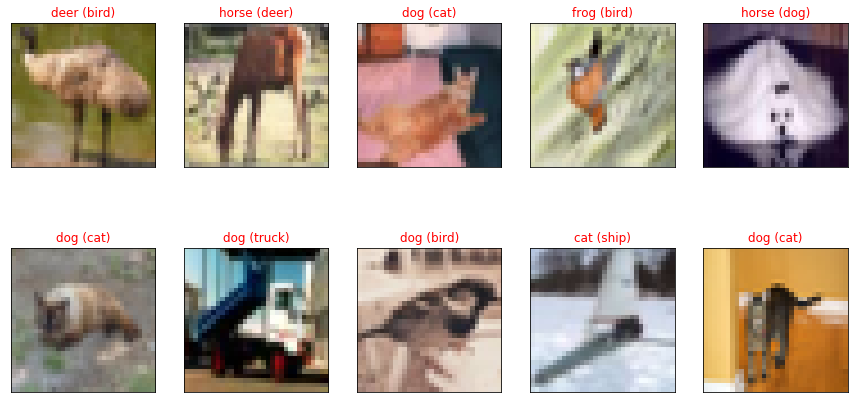

In [14]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

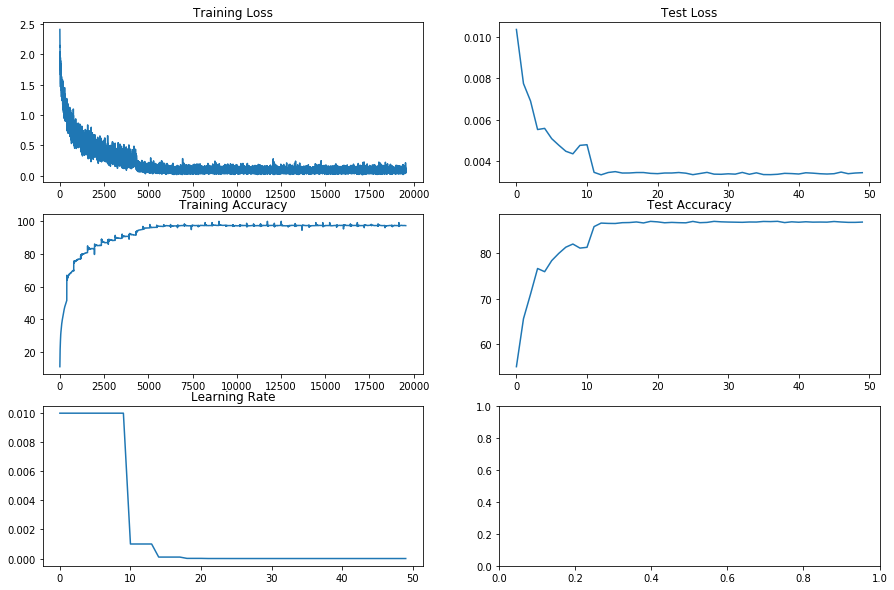

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [16]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)